# Explore here

In [265]:
# Your code here

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')

df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [266]:
df1 = df[['Latitude', 'Longitude', 'MedInc']]

df1


,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [267]:
from sklearn.model_selection import train_test_split

X_train_2, X_test_2 = train_test_split(df1, test_size= 0.2, random_state= 42)
X_train_4, X_test_4 = train_test_split(df1, test_size= 0.2, random_state= 42)
X_train_6, X_test_6 = train_test_split(df1, test_size= 0.2, random_state= 42)

print(X_train_2.shape)
print(X_train_4.shape)
print(X_train_6.shape)


(16512, 3)
(16512, 3)
(16512, 3)


Text(0, 0.5, 'WCSS')

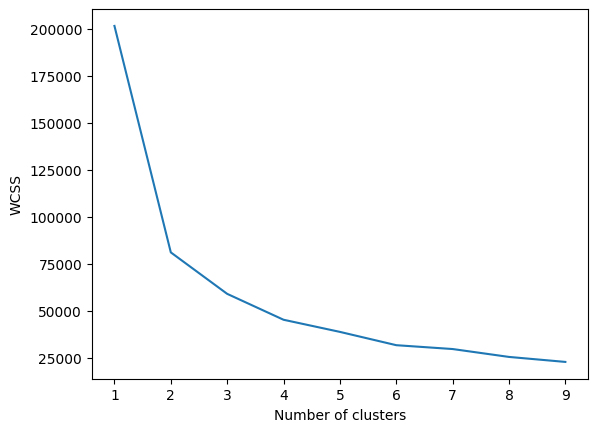

In [268]:
wcss =[]

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(X_train_2)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


In [269]:
from sklearn.cluster import KMeans

model_2 = KMeans(n_clusters=2, random_state=42)
model_2.fit(X_train_2)

KMeans(n_clusters=2, random_state=42)

In [270]:

model_4 = KMeans(n_clusters=4, random_state=42)
model_4.fit(X_train_4)

KMeans(n_clusters=4, random_state=42)

In [271]:

model_6 = KMeans(n_clusters=6, random_state=42)
model_6.fit(X_train_6)

KMeans(n_clusters=6, random_state=42)

In [272]:
X_train_2['cluster_2'] = model_2.predict(X_train_2)
X_train_2

,Latitude,Longitude,MedInc,cluster_2
14196,32.71,-117.03,3.2596,1
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,1
2271,36.78,-119.80,3.5542,0
...,...,...,...,...
11284,33.78,-117.96,6.3700,1
11964,34.02,-117.43,3.0500,1
5390,34.03,-118.38,2.9344,1
860,37.58,-121.96,5.7192,0


In [273]:
X_train_4['cluster_4'] = model_4.predict(X_train_4)
X_train_4

,Latitude,Longitude,MedInc,cluster_4
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,3
17445,34.66,-120.48,4.1563,3
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,0
...,...,...,...,...
11284,33.78,-117.96,6.3700,1
11964,34.02,-117.43,3.0500,3
5390,34.03,-118.38,2.9344,3
860,37.58,-121.96,5.7192,2


In [274]:
X_train_6['cluster_6'] = model_6.predict(X_train_6)
X_train_6

,Latitude,Longitude,MedInc,cluster_6
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5
...,...,...,...,...
11284,33.78,-117.96,6.3700,2
11964,34.02,-117.43,3.0500,3
5390,34.03,-118.38,2.9344,3
860,37.58,-121.96,5.7192,0


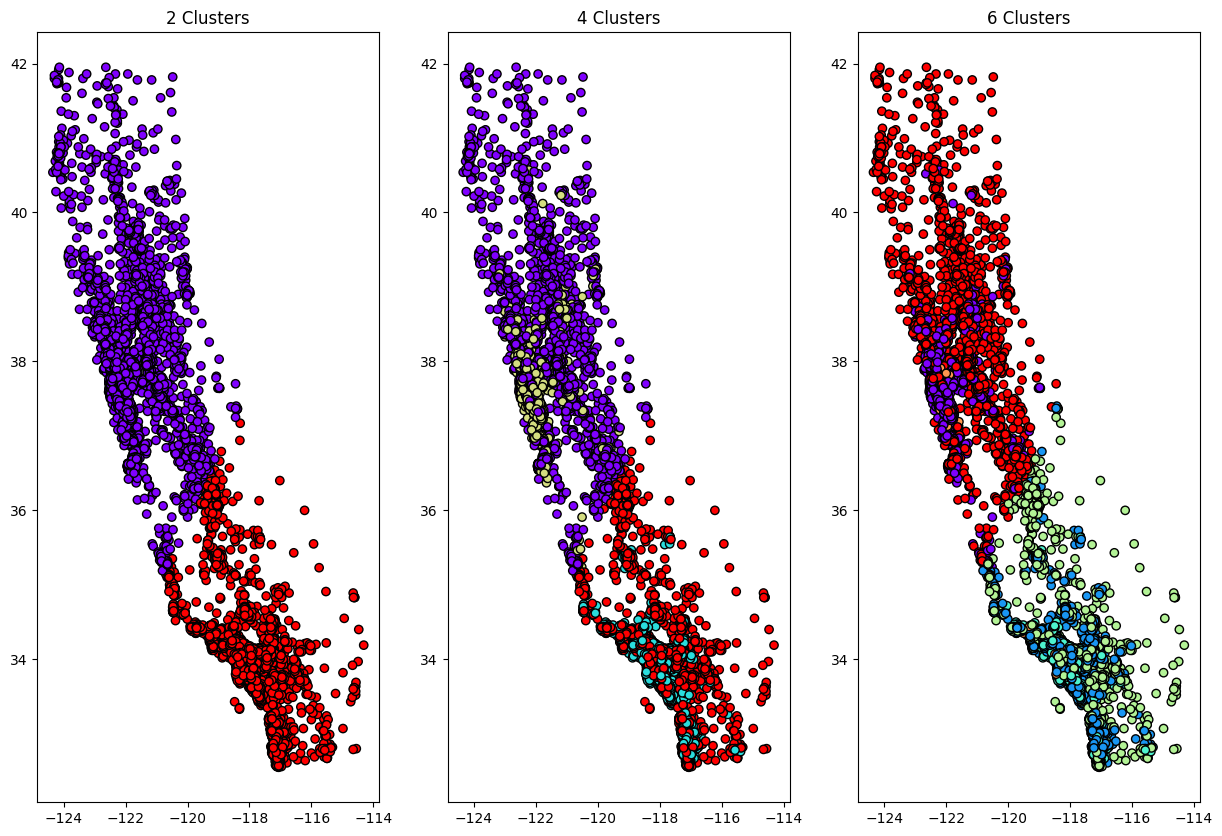

In [275]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 3, figsize=(15, 10))

axis[0].scatter(X_train_2['Longitude'], X_train_2['Latitude'], c=X_train_2['cluster_2'], cmap='rainbow', edgecolor='black')
axis[1].scatter(X_train_4['Longitude'], X_train_4['Latitude'], c=X_train_4['cluster_4'], cmap='rainbow', edgecolor='black')
axis[2].scatter(X_train_6['Longitude'], X_train_6['Latitude'], c=X_train_6['cluster_6'], cmap='rainbow', edgecolor='black')

axis[0].set_title('2 Clusters')
axis[1].set_title('4 Clusters')
axis[2].set_title('6 Clusters')

plt.show()


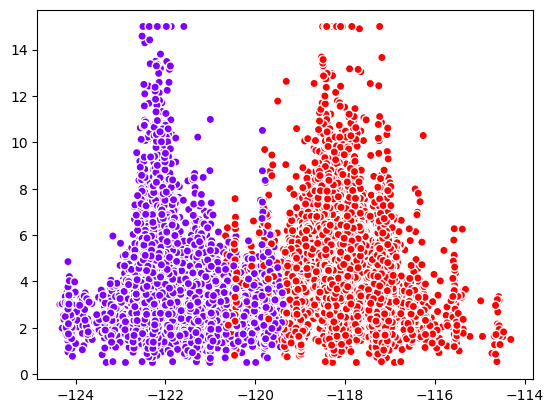

In [276]:
import matplotlib.pyplot as plt

plt.scatter(X_train_2['Longitude'],X_train_2['MedInc'],c=X_train_2['cluster_2'], cmap='rainbow',edgecolor='white')


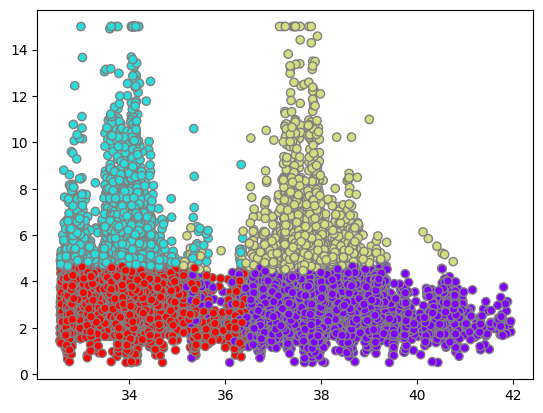

In [277]:
import matplotlib.pyplot as plt

plt.scatter(X_train_4['Latitude'],X_train_4['MedInc'],c=X_train_4['cluster_4'], cmap='rainbow',edgecolor='gray')


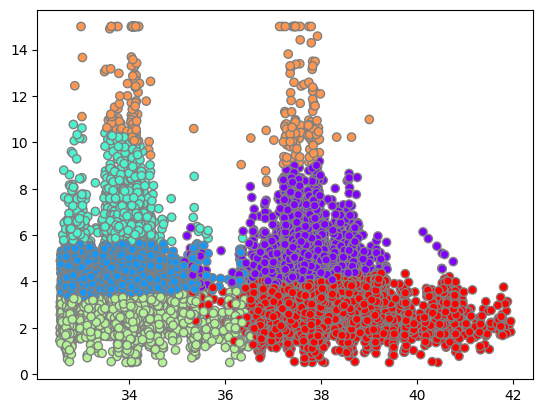

In [278]:
import matplotlib.pyplot as plt

plt.scatter(X_train_6['Latitude'],X_train_6['MedInc'],c=X_train_6['cluster_6'], cmap='rainbow',edgecolor='gray')

In [279]:
X_test_2['cluster_2'] = model_2.predict(X_test_2)
X_test_2.head()

,Latitude,Longitude,MedInc,cluster_2
20046,36.06,-119.01,1.6812,1
3024,35.14,-119.46,2.5313,1
15663,37.80,-122.44,3.4801,0
20484,34.28,-118.72,5.7376,1
9814,36.62,-121.93,3.7250,0


In [280]:
X_test_4['cluster_4'] = model_4.predict(X_test_4)
X_test_4.head()

,Latitude,Longitude,MedInc,cluster_4
20046,36.06,-119.01,1.6812,3
3024,35.14,-119.46,2.5313,3
15663,37.80,-122.44,3.4801,0
20484,34.28,-118.72,5.7376,1
9814,36.62,-121.93,3.7250,0


In [281]:
X_test_6['cluster_6'] = model_6.predict(X_test_6)
X_test_6.head()

,Latitude,Longitude,MedInc,cluster_6
20046,36.06,-119.01,1.6812,3
3024,35.14,-119.46,2.5313,3
15663,37.80,-122.44,3.4801,5
20484,34.28,-118.72,5.7376,2
9814,36.62,-121.93,3.7250,5


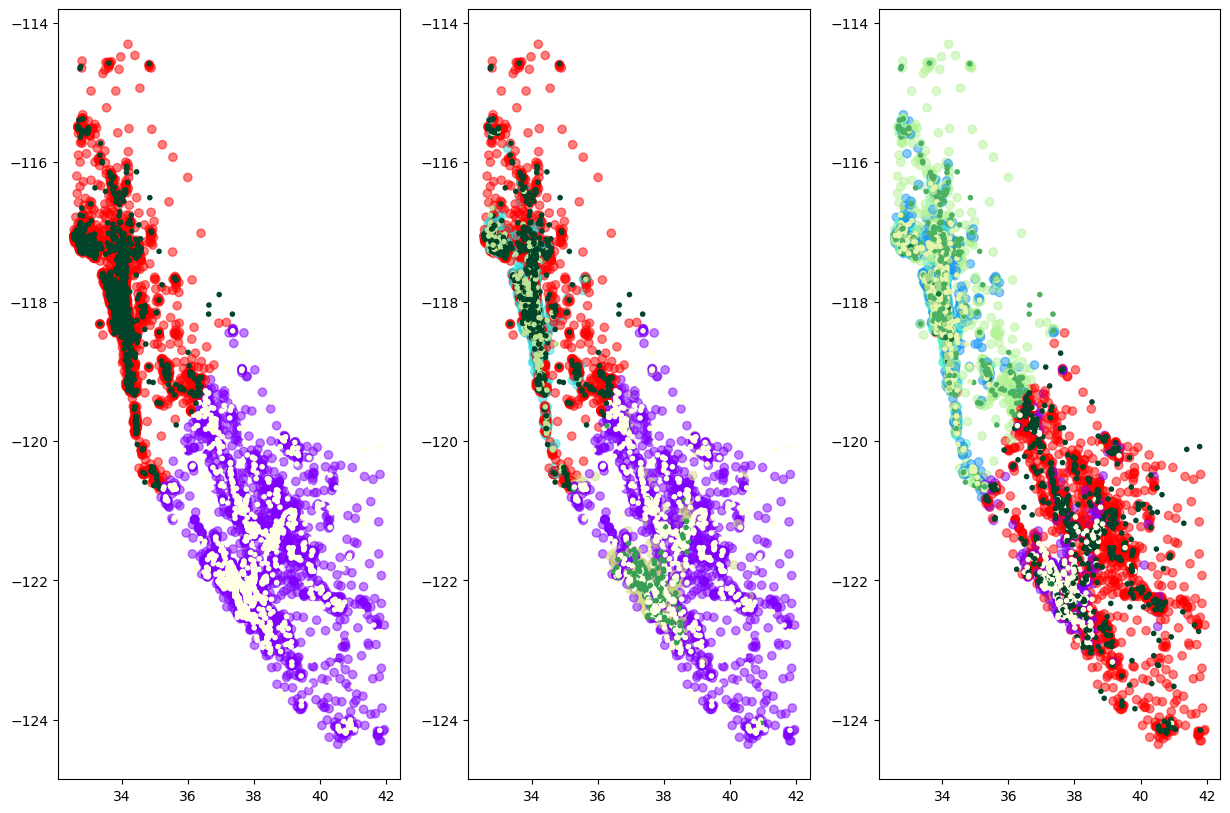

In [282]:
fig, axis = plt.subplots(1, 3, figsize=(15, 10))


axis[0].scatter(X_train_2['Latitude'],X_train_2['Longitude'],c=X_train_2['cluster_2'], cmap='rainbow',alpha=0.5)
axis[0].scatter(X_test_2['Latitude'],X_test_2['Longitude'],c=X_test_2['cluster_2'], cmap='YlGn',marker='.')
axis[1].scatter(X_train_4['Latitude'],X_train_4['Longitude'],c=X_train_4['cluster_4'], cmap='rainbow',alpha=0.5)
axis[1].scatter(X_test_4['Latitude'],X_test_4['Longitude'],c=X_test_4['cluster_4'], cmap='YlGn',marker='.')
axis[2].scatter(X_train_6['Latitude'],X_train_6['Longitude'],c=X_train_6['cluster_6'], cmap='rainbow',alpha=0.5)
axis[2].scatter(X_test_6['Latitude'],X_test_6['Longitude'],c=X_test_6['cluster_6'], cmap='YlGn',marker='.')

In [283]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model_dt_2 = DecisionTreeClassifier(random_state=42)
model_rf_2 =  RandomForestClassifier(random_state=42)
model_dt_4 = DecisionTreeClassifier(random_state=42)
model_rf_4 =  RandomForestClassifier(random_state=42)
model_dt_6 = DecisionTreeClassifier(random_state=42)
model_rf_6 =  RandomForestClassifier(random_state=42)

y_train_2 = X_train_2.cluster_2
X_train_2 = X_train_2.drop(['cluster_2'],axis=1)
y_train_4 = X_train_4.cluster_4
X_train_4 = X_train_4.drop(['cluster_4'],axis=1)
y_train_6 = X_train_6.cluster_6
X_train_6 = X_train_6.drop(['cluster_6'],axis=1)

model_dt_2.fit(X_train_2,y_train_2)
model_rf_2.fit(X_train_2,y_train_2)
model_dt_4.fit(X_train_4,y_train_4)
model_rf_4.fit(X_train_4,y_train_4)
model_dt_6.fit(X_train_6,y_train_6)
model_rf_6.fit(X_train_6,y_train_6)

y_test_2 = X_test_2.cluster_2
X_test_2 = X_test_2.drop(['cluster_2'],axis=1)
y_test_4 = X_test_4.cluster_4
X_test_4 = X_test_4.drop(['cluster_4'],axis=1)
y_test_6 = X_test_6.cluster_6
X_test_6 = X_test_6.drop(['cluster_6'],axis=1)

y_pred_dt_2 = model_dt_2.predict(X_test_2)
y_pred_rf_2 = model_rf_2.predict(X_test_2)
y_pred_dt_4 = model_dt_4.predict(X_test_4)
y_pred_rf_4 = model_rf_4.predict(X_test_4)
y_pred_dt_6 = model_dt_6.predict(X_test_6)
y_pred_rf_6 = model_rf_6.predict(X_test_6)


In [287]:
from sklearn.metrics import accuracy_score

as_dt_2 = accuracy_score(y_test_2,y_pred_dt_2)
as_rf_2 = accuracy_score(y_test_2,y_pred_rf_2)
as_dt_4 = accuracy_score(y_test_4,y_pred_dt_4)
as_rf_4 = accuracy_score(y_test_4,y_pred_rf_4)
as_dt_6 = accuracy_score(y_test_6,y_pred_dt_6)
as_rf_6 = accuracy_score(y_test_6,y_pred_rf_6)

print (f'arbol de decision 2 clusters = {as_dt_2}')
print (f'random forest 2 clusters = {as_rf_2}')
print (f'arbol de decision 4 clusters = {as_dt_4}')
print (f'random forest 4 clusters = {as_rf_4}')
print (f'arbol de decision 6 clusters = {as_dt_6}')
print (f'random forest 6 clusters = {as_rf_6}')

arbol de decision 2 clusters = 1.0
random forest 2 clusters = 0.999515503875969
arbol de decision 4 clusters = 0.9968507751937985
random forest 4 clusters = 0.9978197674418605
arbol de decision 6 clusters = 0.9941860465116279
random forest 6 clusters = 0.9956395348837209


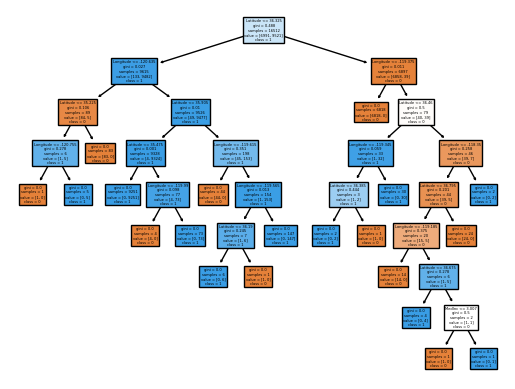

In [288]:
from sklearn import tree

tree.plot_tree(model_dt_2, feature_names=X_train_2.columns, class_names=['0','1','2','3','4','5'],filled=True)
plt.show()

In [289]:
from pickle import dump

dump(model_dt_2,open( "../models/model_dt_2.model","wb"))
dump(model_rf_2,open( "../models/model_rt_2.model","wb"))
dump(model_2,open( "../models/model_K_means_2.model","wb"))
dump(model_dt_4,open( "../models/model_dt_4.model","wb"))
dump(model_rf_4,open( "../models/model_rt_4.model","wb"))
dump(model_4,open( "../models/model_K_means_4.model","wb"))
dump(model_dt_6,open( "../models/model_dt_6.model","wb"))
dump(model_rf_6,open( "../models/model_rt_6.model","wb"))
dump(model_6,open( "../models/model_K_means_6.model","wb"))
